# Random Forest

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

### Import data

In [2]:
X_train_s = np.load('data/X_train_s.npy')
X_test_s = np.load('data/X_test_s.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

feature_names = np.load('data/feature_names.npy')

### Parameter Optimization

In [3]:
def calc_params(X, y, clf, param_values, param_name, K, verbose=False):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        
        if (verbose):
            s = "{} {:.3f} train {:.3f} test {:.3f}"
            print(s.format(param_name, param_value, train_scores[i], test_scores[i]))
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    plt.grid(True)

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

#### n_estimators

The number of trees in the forest.

n_estimators 1.000 train 0.973 test 0.925
n_estimators 2.000 train 0.975 test 0.935
n_estimators 3.000 train 0.990 test 0.948
n_estimators 4.000 train 0.990 test 0.950
n_estimators 5.000 train 0.995 test 0.954
n_estimators 6.000 train 0.994 test 0.955
n_estimators 7.000 train 0.997 test 0.956
n_estimators 8.000 train 0.996 test 0.958
n_estimators 9.000 train 0.998 test 0.958
n_estimators 10.000 train 0.997 test 0.959
n_estimators 11.000 train 0.998 test 0.959
n_estimators 12.000 train 0.998 test 0.960
n_estimators 13.000 train 0.999 test 0.960
n_estimators 14.000 train 0.998 test 0.960
n_estimators 15.000 train 0.999 test 0.960
n_estimators 16.000 train 0.999 test 0.960
n_estimators 17.000 train 0.999 test 0.960
n_estimators 18.000 train 0.999 test 0.961
n_estimators 19.000 train 0.999 test 0.960
n_estimators 20.000 train 0.999 test 0.961
n_estimators 21.000 train 0.999 test 0.961
n_estimators 22.000 train 0.999 test 0.961
n_estimators 23.000 train 1.000 test 0.961
n_estimators 24.000 

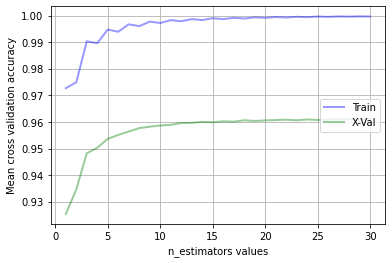

In [4]:
rf = RandomForestClassifier(random_state=33, n_jobs=-1)

param_range = range(1,31)

%time train_scores, test_scores = calc_params(X_train_s, y_train, rf, param_range, 'n_estimators', 5, verbose=True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

#### max_depth

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

max_depth 1.000 train 0.838 test 0.838
max_depth 2.000 train 0.849 test 0.849
max_depth 3.000 train 0.887 test 0.887
max_depth 4.000 train 0.907 test 0.907
max_depth 5.000 train 0.919 test 0.918
max_depth 6.000 train 0.927 test 0.926
max_depth 7.000 train 0.933 test 0.933
max_depth 8.000 train 0.939 test 0.937
max_depth 9.000 train 0.944 test 0.942
max_depth 10.000 train 0.950 test 0.947
max_depth 11.000 train 0.956 test 0.950
max_depth 12.000 train 0.962 test 0.953
max_depth 13.000 train 0.966 test 0.955
max_depth 14.000 train 0.971 test 0.957
max_depth 15.000 train 0.976 test 0.958
max_depth 16.000 train 0.979 test 0.958
max_depth 17.000 train 0.984 test 0.959
max_depth 18.000 train 0.987 test 0.959
max_depth 19.000 train 0.989 test 0.959
max_depth 20.000 train 0.991 test 0.959
max_depth 21.000 train 0.993 test 0.959
max_depth 22.000 train 0.994 test 0.959
max_depth 23.000 train 0.995 test 0.959
max_depth 24.000 train 0.996 test 0.959
max_depth 25.000 train 0.997 test 0.959
max_depth

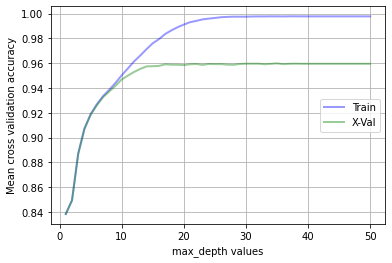

In [5]:
rf = RandomForestClassifier(n_estimators=12, random_state=33, n_jobs=-1)

param_range = range(1,51)

train_scores, test_scores = calc_params(X_train_s, y_train, rf, param_range, 'max_depth', 5, verbose=True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

#### min_samples_split

The minimum number of samples required to split an internal node:
* If int, then consider min_samples_split as the minimum number.
* If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


min_samples_split 2.000 train 0.998 test 0.960
min_samples_split 3.000 train 0.996 test 0.960
min_samples_split 4.000 train 0.994 test 0.959
min_samples_split 5.000 train 0.992 test 0.959
min_samples_split 6.000 train 0.990 test 0.960
min_samples_split 7.000 train 0.988 test 0.960
min_samples_split 8.000 train 0.986 test 0.960
min_samples_split 9.000 train 0.984 test 0.960
min_samples_split 10.000 train 0.983 test 0.960
min_samples_split 11.000 train 0.982 test 0.960
min_samples_split 12.000 train 0.981 test 0.960
min_samples_split 13.000 train 0.980 test 0.960
min_samples_split 14.000 train 0.978 test 0.961
min_samples_split 15.000 train 0.978 test 0.960
min_samples_split 16.000 train 0.977 test 0.961
min_samples_split 17.000 train 0.976 test 0.960
min_samples_split 18.000 train 0.976 test 0.961
min_samples_split 19.000 train 0.975 test 0.960
min_samples_split 20.000 train 0.974 test 0.960
min_samples_split 21.000 train 0.974 test 0.960
min_samples_split 22.000 train 0.973 test 0.960


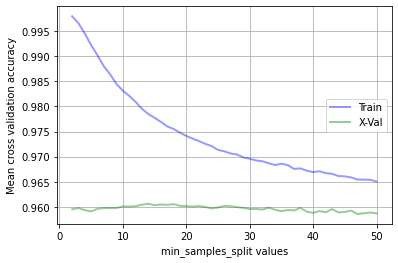

In [7]:
rf = RandomForestClassifier(n_estimators=12, random_state=33, n_jobs=-1)

param_range = range(2,51)

train_scores, test_scores = calc_params(X_train_s, y_train, rf, param_range, 'min_samples_split', 5, verbose=True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

#### min_samples_leaf

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* If int, then consider min_samples_leaf as the minimum number.
* If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.


min_samples_leaf 1.000 train 0.998 test 0.960
min_samples_leaf 2.000 train 0.989 test 0.959
min_samples_leaf 3.000 train 0.982 test 0.959
min_samples_leaf 4.000 train 0.977 test 0.960
min_samples_leaf 5.000 train 0.974 test 0.959
min_samples_leaf 6.000 train 0.971 test 0.957
min_samples_leaf 7.000 train 0.969 test 0.957
min_samples_leaf 8.000 train 0.967 test 0.957
min_samples_leaf 9.000 train 0.966 test 0.957
min_samples_leaf 10.000 train 0.964 test 0.956
min_samples_leaf 11.000 train 0.963 test 0.956
min_samples_leaf 12.000 train 0.962 test 0.955
min_samples_leaf 13.000 train 0.961 test 0.954
min_samples_leaf 14.000 train 0.961 test 0.954
min_samples_leaf 15.000 train 0.960 test 0.953
min_samples_leaf 16.000 train 0.960 test 0.955
min_samples_leaf 17.000 train 0.958 test 0.954
min_samples_leaf 18.000 train 0.958 test 0.953
min_samples_leaf 19.000 train 0.957 test 0.952
min_samples_leaf 20.000 train 0.956 test 0.952
min_samples_leaf 21.000 train 0.956 test 0.952
min_samples_leaf 22.00

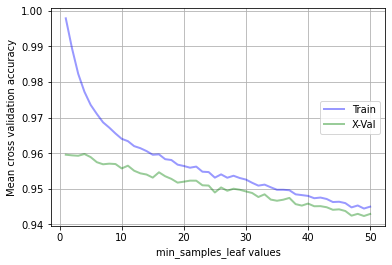

In [8]:
rf = RandomForestClassifier(n_estimators=12, random_state=33, n_jobs=-1)

param_range = range(1,51)

train_scores, test_scores = calc_params(X_train_s, y_train, rf, param_range, 'min_samples_leaf', 5, verbose=True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

#### max_leaf_nodes

Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

max_leaf_nodes 100.000 train 0.941 test 0.939
max_leaf_nodes 200.000 train 0.950 test 0.947
max_leaf_nodes 300.000 train 0.955 test 0.951
max_leaf_nodes 400.000 train 0.959 test 0.954
max_leaf_nodes 500.000 train 0.962 test 0.955
max_leaf_nodes 600.000 train 0.965 test 0.956
max_leaf_nodes 700.000 train 0.966 test 0.956
max_leaf_nodes 800.000 train 0.968 test 0.957
max_leaf_nodes 900.000 train 0.970 test 0.957
max_leaf_nodes 1000.000 train 0.971 test 0.958
max_leaf_nodes 1100.000 train 0.973 test 0.958
max_leaf_nodes 1200.000 train 0.974 test 0.958
max_leaf_nodes 1300.000 train 0.976 test 0.959
max_leaf_nodes 1400.000 train 0.977 test 0.959
max_leaf_nodes 1500.000 train 0.978 test 0.959
max_leaf_nodes 1600.000 train 0.980 test 0.959
max_leaf_nodes 1700.000 train 0.981 test 0.959
max_leaf_nodes 1800.000 train 0.982 test 0.959
max_leaf_nodes 1900.000 train 0.983 test 0.959
max_leaf_nodes 2000.000 train 0.984 test 0.959

Best Score 0.959 for parameter value 1900


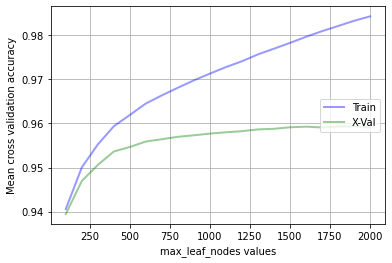

In [19]:
rf = RandomForestClassifier(n_estimators=12, random_state=33, n_jobs=-1)

param_range = [*range(100,2001, 100)]

train_scores, test_scores = calc_params(X_train_s, y_train, rf, param_range, 'max_leaf_nodes', 5, verbose=True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

#### Gridsearch

In [33]:
rf = RandomForestClassifier(n_estimators=12, random_state=33, n_jobs=-1)

# parameter values to be optimized for
parameters = {
    'max_depth': [*range(15, 26)],
    'min_samples_split' : [*range(10, 21)],
    'min_samples_leaf' : [*range(3, 6)],
    'max_leaf_nodes' : [*range(1300, 1700, 100)],
#    'class_weight' : [None, 'balanced'],
    'criterion': ['entropy'] #, 'gini'
}

# GridSearch finds the best combination of paramters
#tree_gs = GridSearchCV(dt, parameters, verbose=3, cv=3, scoring='accuracy', n_jobs=-1, return_train_score=False)
rf_gs = RandomizedSearchCV(rf, parameters, verbose=3, cv=3, n_iter=5000, scoring='accuracy', n_jobs=-1, return_train_score=False)

In [34]:
%time rf_gs.fit(X_train_s, y_train) # performs gridsearch
print(rf_gs.best_params_)
print("RMSE (test): {:.4f}".format(rf_gs.best_score_))

Fitting 3 folds for each of 1452 candidates, totalling 4356 fits


/Users/davidmaciulis/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1452 is smaller than n_iter=5000. Running 1452 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 3856 t

CPU times: user 17.4 s, sys: 3.49 s, total: 20.8 s
Wall time: 21min 42s
{'min_samples_split': 13, 'min_samples_leaf': 3, 'max_leaf_nodes': 1600, 'max_depth': 25, 'criterion': 'entropy'}
RMSE (test): 0.9593


### The Final Random Forest Model

In [48]:
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [49]:
def fit_predict_score(y_test, predicted):
    """Predicts the average accuracy score of a classifier clf and outputs a confusion matrix."""
    
    #cross tabulation of predicted and actual values produces the correlation matrix
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),4)
    plt.title("Confusion Matrix", fontsize = 12)
    plt.show()
    print("Accuracy Score: ",accuracy)
    print (metrics.classification_report(y_test,predicted))

In [50]:
rf = RandomForestClassifier( min_samples_split=13, 
                             min_samples_leaf=3, 
                             max_depth=25, 
                             criterion='entropy', 
                             class_weight=None,
                             max_leaf_nodes=1600,
                             n_estimators=40,
                             n_jobs=-1)

fit = rf.fit(X_train_s, y_train)
predicted = fit.predict(X_test_s)
train_eval_score = rf.score(X_train_s, y_train)
test_eval_score = rf.score(X_test_s, y_test)

print("Evaluation scores Train {:.3f} Test {:.3f}".format(train_eval_score, test_eval_score))

Evaluation scores Train 0.974 Test 0.957


### Confusion Matrix

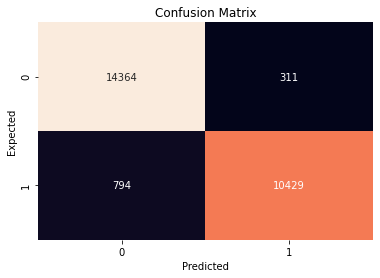

Accuracy Score:  0.9573
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14675
           1       0.97      0.93      0.95     11223

    accuracy                           0.96     25898
   macro avg       0.96      0.95      0.96     25898
weighted avg       0.96      0.96      0.96     25898



In [51]:
fit_predict_score(y_test, predicted);

### ROC

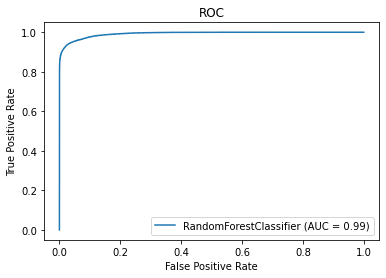

In [52]:
rf_roc = plot_roc_curve(rf, X_test_s, y_test)
plt.title("ROC")
plt.show()

In [1]:
rf_roc

NameError: name 'rf_roc' is not defined

### Precision / Recall Tradeoff and the optimal Threshold

Model=RF Best Threshold=0.463046, F-Score=0.951


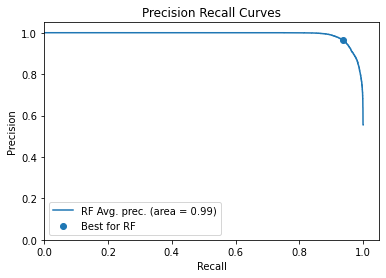

In [53]:
y_hat = rf.predict_proba(X_test_s)

average_precision = average_precision_score(y_test, y_hat[:,1])
precision, recall, thresholds = precision_recall_curve(y_test, y_hat[:,1])
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = np.argmax(fscore)
print('Model=%s Best Threshold=%f, F-Score=%.3f' % ("RF",thresholds[ix], fscore[ix]))
bestlabel = 'Best for ' + "RF"
plt.plot(recall, precision, label='%s Avg. prec. (area = %0.2f)' % ("RF", average_precision))
plt.scatter(recall[ix], precision[ix], marker='o', label=bestlabel)


plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curves')
plt.legend(loc="lower left")
plt.show()   # Display

### Feature Selection

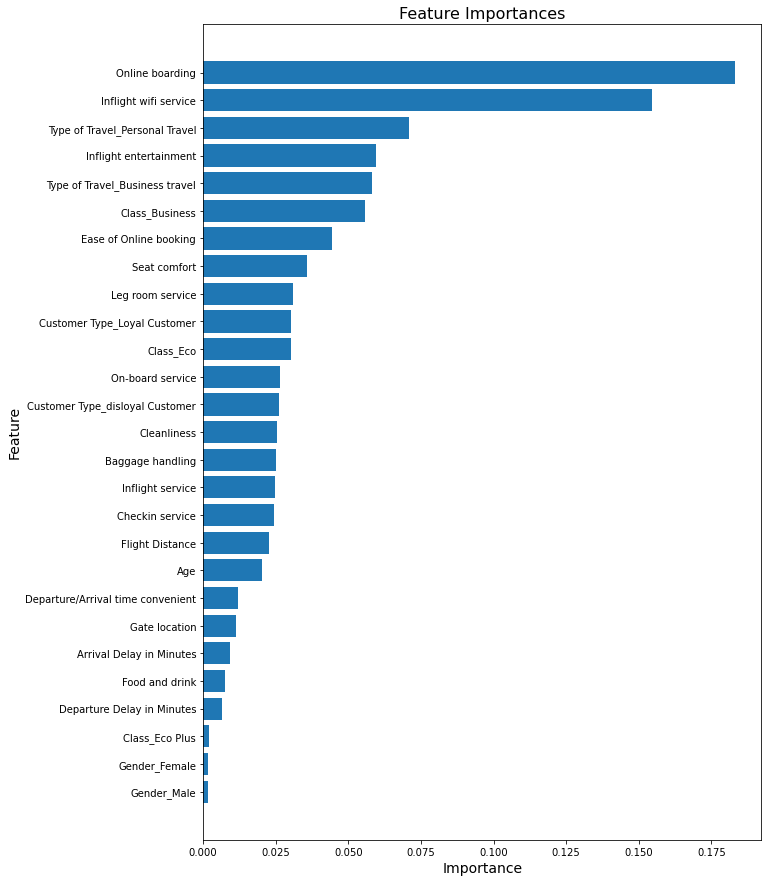

In [54]:
p = rf.feature_importances_.argsort()

plt.figure(figsize=(10,15));
plt.barh(feature_names[p], rf.feature_importances_[p]);
plt.title("Feature Importances", size=16);
plt.xlabel("Importance", size=14);
plt.ylabel("Feature", size=14);
plt.show();